## Advanced Regressoin Assignment

### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia

### Business Goal 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### Import Libraries

In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Import warning package to ignore the warnings

In [352]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Read train csv

In [353]:
df = pd.read_csv("train.csv")

#### Quick look at column and data

In [354]:
df.head()
display("-------------------")

display(df.info())
display("-------------------")

display(df.describe(include='all'))

'-------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

'-------------------'

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


### Data cleaning

In [355]:
# Identify null columns
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [356]:
# Identify percentage of null columns
df_missing=pd.DataFrame((round(100*(df.isnull().sum()/len(df.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


Observation:
we should impute the following columns and drop some which are not required
- PoolQC 
- MiscFeature 
- Alley 
- Fence 
- FireplaceQu 
- LotFrontage

### Missing value imputation

In [357]:
# Filling with default values for nulls
df['PoolQC'] = df['PoolQC'].fillna('No_Pool')
df['MiscFeature'] = df['MiscFeature'].fillna('None')
df['Alley'] = df['Alley'].fillna('No_Alley_Access')
df['Fence'] = df['Fence'].fillna('No_Fence')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No_Fireplace')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['Electrical'] = df['Electrical'].fillna("Other")

In [358]:
## Dropping the LotFontgage columns as it have more Null values
df.drop("LotFrontage",axis = 1, inplace=True)

# Imputing the Nan Values with 'No Basementdf'
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    df[col] = df[col].fillna('No_Basement')

#Imputing the NaN values with 'no garage' 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('No_Garage')

df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

### Univariate and Bivariate Analysis

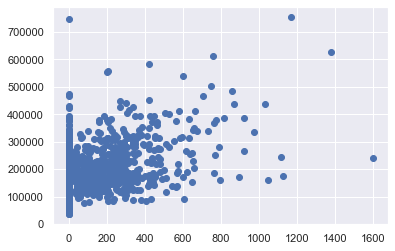

In [359]:
## plotting sactter for sale price
plt.scatter(df.MasVnrArea,df['SalePrice'])

Text(0.5, 1.0, 'Veneer Area')

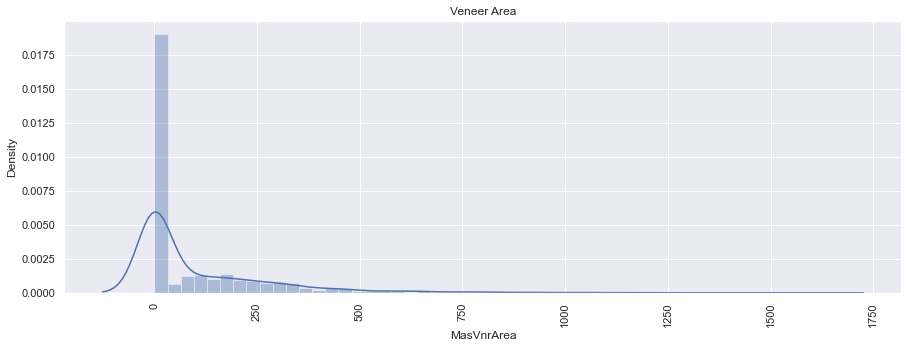

In [360]:
# plotting a distplot 
plt.figure(figsize = (15,5))
sns.distplot(df['MasVnrArea']).tick_params(axis='x', rotation = 90)
plt.title('Veneer Area')

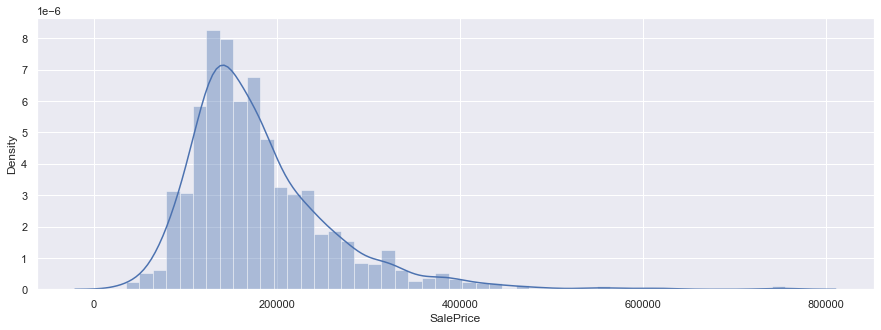

In [361]:
# dist plot for saleprice
plt.figure(figsize = (15,5))
sns.distplot(df['SalePrice'])
plt.show()

In [362]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


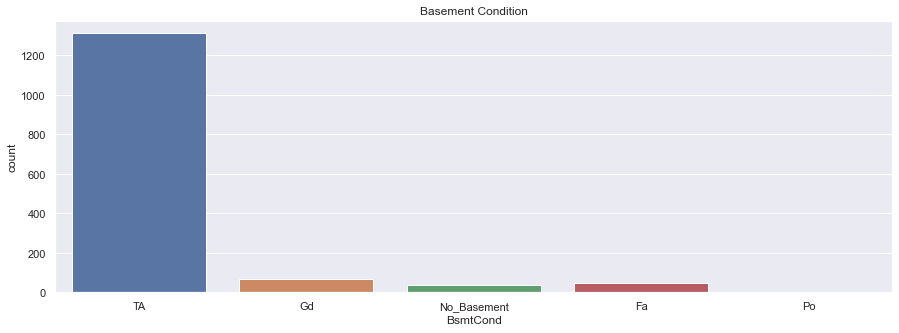

In [363]:
## Checking Basement counts
plt.figure(figsize = (15,5))
sns.countplot(x='BsmtCond', data= df)
plt.title('Basement Condition')
plt.show()

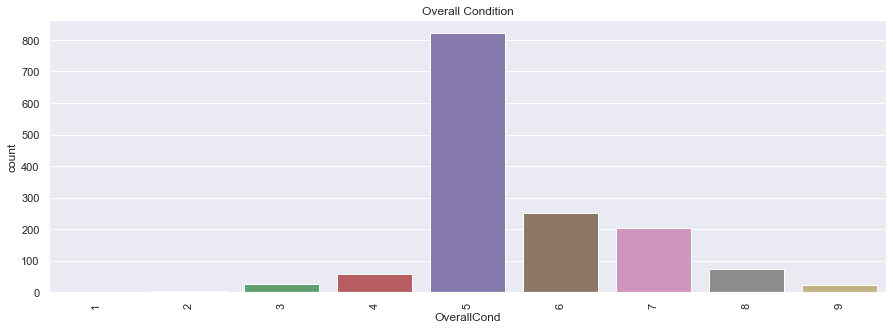

In [364]:
plt.figure(figsize = (15,5))
sns.countplot(x='OverallCond', data= df).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1080x360 with 0 Axes>

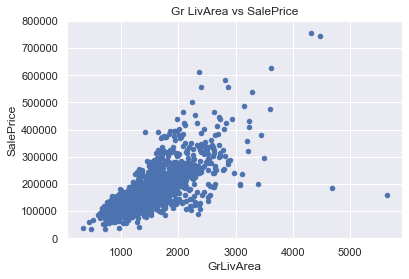

In [365]:
plt.figure(figsize = (15,5))
data = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));
plt.title('Gr LivArea vs SalePrice')
plt.show()

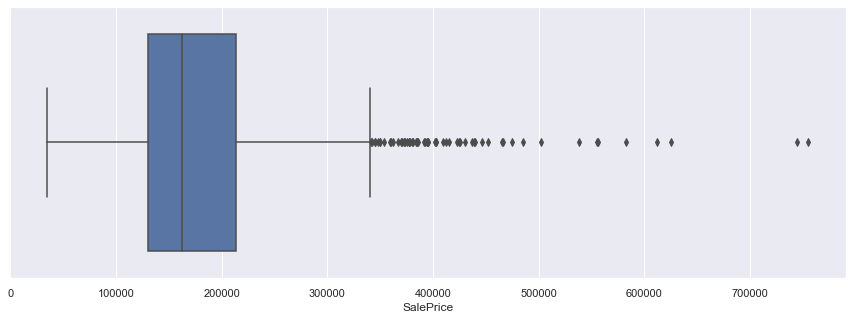

In [366]:
# Checking the outliers 
plt.figure(figsize = (15,5))
sns.boxplot(x='SalePrice', data=df)
plt.show()

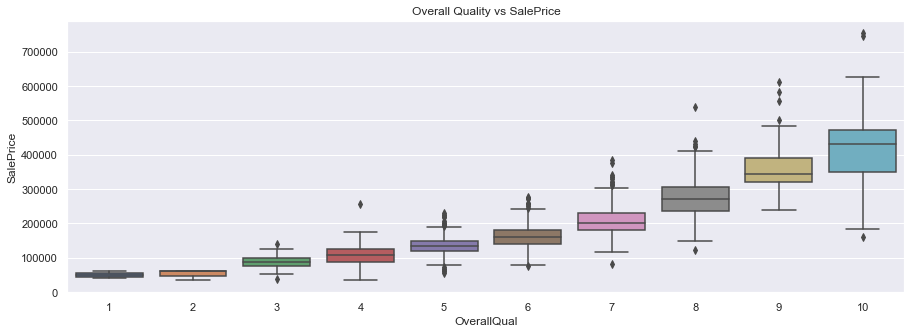

In [367]:
plt.figure(figsize = (15,5))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title("Overall Quality vs SalePrice")
plt.show()

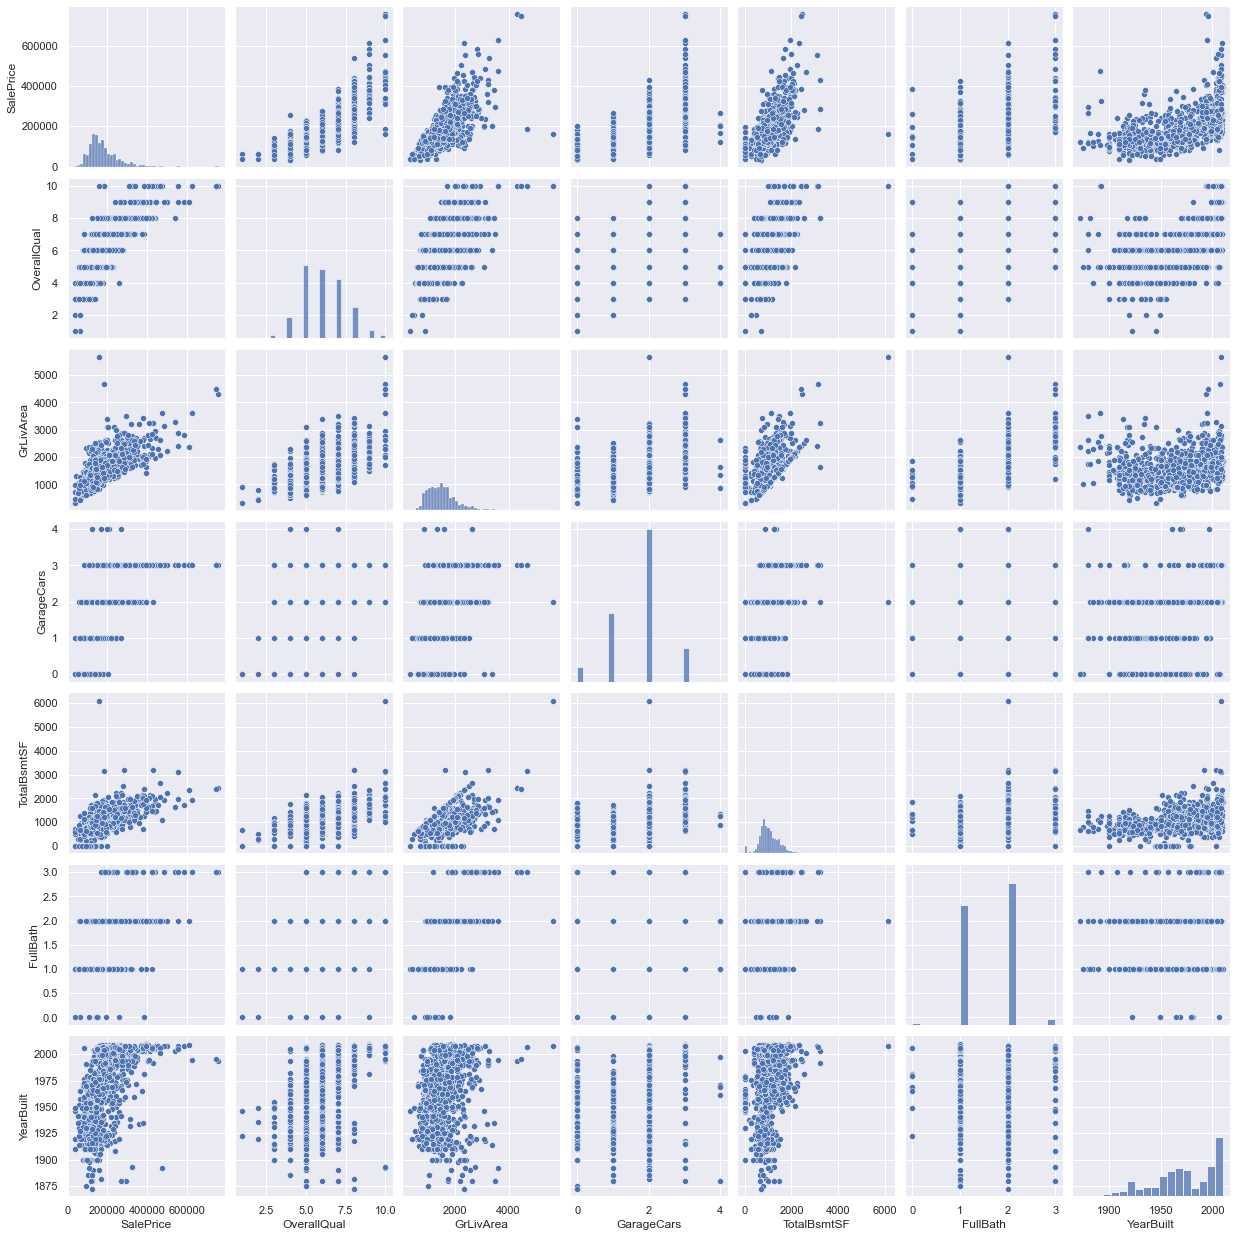

In [368]:
# scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

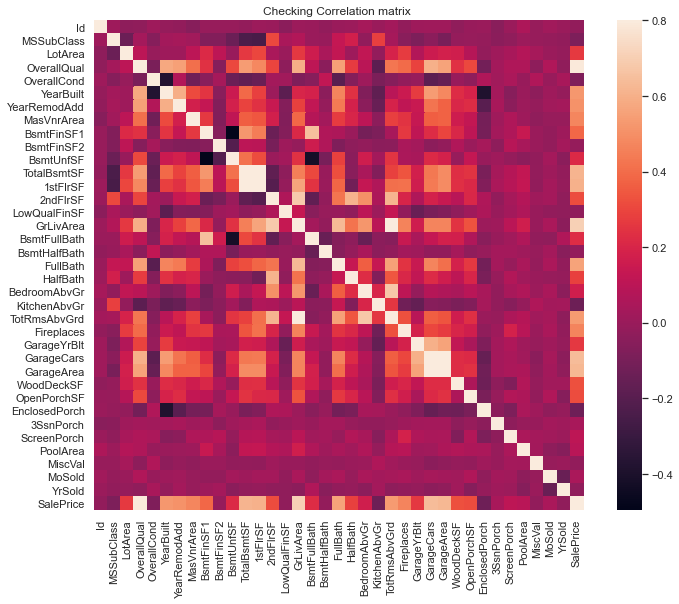

In [369]:
# checking the correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title("Checking Correlation matrix ")
plt.show()

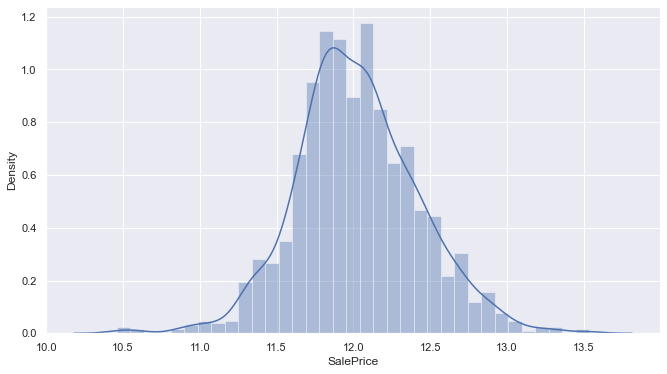

In [370]:
## sales price with log()
plt.figure(figsize=(11,6))
sns.distplot(np.log(df["SalePrice"]))
plt.show()

In [371]:
# Deriving varibles
numeric_data = df.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [372]:
# Converting a Binary varible into numeric datatypes
# mapping it to 0 and 1
df['Street'] = df['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )

df['CentralAir'] = df['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
                                                  
df['PavedDrive'] = df['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)  

In [373]:
cat_values = df.select_dtypes(include=['object'])
cat_values.head()

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,No_Fireplace,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
1,RL,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
2,RL,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
3,RL,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,No_Pool,No_Fence,None,WD,Abnorml
4,RL,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal


In [374]:
# convert into dummies
data_dummies = pd.get_dummies(cat_values, drop_first=True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [375]:
# convert into dummies
data_dummies = pd.get_dummies(cat_values, drop_first=True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [376]:
# Droping the original categorical column
df = df.drop(list(cat_values.columns), axis=1)

In [377]:
# Adding the dummy categorical column to original dataset
df = pd.concat([df,data_dummies], axis=1)

In [378]:
df.shape

(1460, 260)

### Train & Test Split

In [379]:
## spliting train and test data
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [380]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [381]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [382]:
## Scaling the data
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

### Model Building

In [383]:
## Building a Regression model.
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [384]:
# Calculating the RFE
rfe = RFE(reg, 20)
rfe = rfe.fit(X_train, y_train)

In [385]:
col=X_train.columns[rfe.support_]
col

Index(['TotalBsmtSF', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Condition2_PosN', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'BsmtQual_No_Basement', 'BsmtFinType1_No_Basement',
       'BsmtFinType2_No_Basement', 'Functional_Sev', 'GarageCond_TA',
       'PoolQC_Gd'],
      dtype='object')

In [386]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

# create first model
lr=sm.OLS(y_train,X_train_new)

# fit the model
lr_model=lr.fit()

# Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     69.16
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          3.71e-167
Time:                        19:53:18   Log-Likelihood:                -76.133
No. Observations:                1021   AIC:                             192.3
Df Residuals:                    1001   BIC:                             290.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.0817      0.102    108.500      0.000      10.881      11.282
TotalBsmtSF                  0.2627      0.011     24.598      0.000       0.242       0.284
MSZoning_FV                  0.9177      0.107      8.546      0.000       0.707       1.128
MSZoning_RH                  0.6490      0.124      5.251      0.000       0.406       0.892
MSZoning_RL                  0.7071      0.101      7.035      0.000       0.510       0.904
MSZoning_RM                  0.5413      0.102      5.317      0.000       0.342       0.741
Condition2_PosN             -1.1289      0.267     -4.220      0.000      -1.654      -0.604
RoofMatl_Membran             0.1426      0.264      0.541      0.589      -0.375       0.660
RoofMatl_Metal               0.1046      0.264      0.397      0.692      -0.413       0.622
RoofMatl_Roll                0.1155      0.265      0.436      0.663      -0.404       0.635
RoofMatl_Tar&Grv             0.1368      0.124      1.099      0.272      -0.107       0.381
RoofMatl_WdShake             0.3057      0.132      2.316      0.021       0.047       0.565
RoofMatl_WdShngl             0.2726      0.133      2.053      0.040       0.012       0.533
Exterior1st_BrkComm         -0.7031      0.198     -3.556      0.000      -1.091      -0.315
Exterior1st_CBlock          -0.3783      0.264     -1.435      0.151      -0.896       0.139
BsmtQual_No_Basement         0.4766      0.139      3.432      0.001       0.204       0.749
BsmtFinType1_No_Basement     0.4766      0.139      3.432      0.001       0.204       0.749
BsmtFinType2_No_Basement    -0.7379      0.268     -2.756      0.006      -1.263      -0.212
Functional_Sev              -0.4129      0.291     -1.418      0.156      -0.984       0.158
GarageCond_TA                0.2782      0.029      9.472      0.000       0.221       0.336
PoolQC_Gd                   -2.9742      0.288    -10.341      0.000      -3.539      -2.410
==============================================================================
Omnibus:                        8.445   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.375
Skew:                           0.213   Prob(JB):                       0.0152
Kurtosis:                       3.123   Cond. No.                     8.21e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.84e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Redge Regression

In [387]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [388]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.2}
-0.08876901551715931


In [389]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007484,0.001241,0.002717,0.000235,0.0001,{'alpha': 0.0001},-0.091165,-0.095917,-0.095233,-0.086988,...,-0.090423,0.004972,14,-0.054604,-0.055115,-0.055869,-0.056740,-0.055652,-0.055596,0.000721
1,0.005376,0.000202,0.002341,0.000186,0.001,{'alpha': 0.001},-0.090832,-0.095871,-0.095177,-0.086854,...,-0.090284,0.005000,13,-0.054636,-0.055124,-0.055882,-0.056814,-0.055686,-0.055628,0.000736
2,0.005576,0.000384,0.002623,0.000295,0.01,{'alpha': 0.01},-0.090018,-0.095516,-0.094777,-0.086133,...,-0.089767,0.005016,8,-0.054818,-0.055239,-0.056016,-0.057046,-0.055822,-0.055788,0.000759
3,0.005579,0.000707,0.002481,0.000337,0.05,{'alpha': 0.05},-0.089635,-0.094587,-0.094174,-0.084034,...,-0.089081,0.004885,4,-0.055805,-0.055711,-0.056613,-0.057694,-0.056688,-0.056502,0.000718
4,0.005577,0.000211,0.002547,0.000411,0.1,{'alpha': 0.1},-0.089435,-0.094093,-0.094219,-0.082653,...,-0.088778,0.004975,2,-0.057023,-0.056183,-0.057284,-0.058659,-0.057788,-0.057387,0.000821
5,0.005929,0.000634,0.002637,0.000365,0.2,{'alpha': 0.2},-0.089893,-0.093793,-0.094750,-0.081194,...,-0.088769,0.005299,1,-0.059138,-0.056912,-0.058596,-0.060645,-0.059695,-0.058997,0.001243
6,0.006105,0.000669,0.002897,0.000215,0.3,{'alpha': 0.3},-0.090479,-0.093752,-0.095254,-0.080177,...,-0.088884,0.005650,3,-0.060819,-0.057521,-0.059791,-0.062371,-0.061386,-0.060378,0.001655
7,0.005962,0.000697,0.002509,0.000279,0.4,{'alpha': 0.4},-0.090982,-0.093845,-0.095719,-0.079517,...,-0.089107,0.005914,5,-0.062188,-0.058043,-0.060730,-0.063764,-0.062786,-0.061502,0.001990
8,0.005704,0.000584,0.002514,0.000281,0.5,{'alpha': 0.5},-0.091335,-0.093906,-0.096109,-0.079490,...,-0.089382,0.005972,6,-0.063411,-0.058511,-0.061534,-0.064906,-0.063941,-0.062461,0.002260
9,0.005922,0.000791,0.002532,0.000458,0.6,{'alpha': 0.6},-0.091616,-0.093952,-0.096419,-0.079585,...,-0.089614,0.005990,7,-0.064441,-0.058948,-0.062206,-0.065866,-0.064909,-0.063274,0.002474


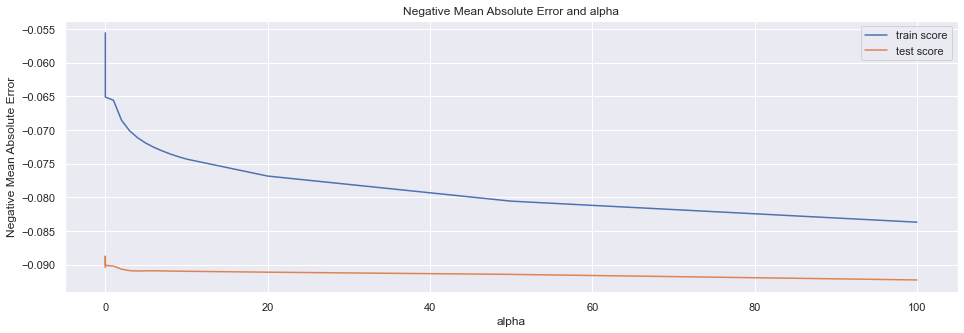

In [390]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [391]:
#final ridge model
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.67906244e-03, -2.14555345e-02,  1.87378870e-02,  7.41798429e-03,
        7.91318364e-02,  4.07518354e-02,  3.69917404e-02,  2.05718333e-02,
       -2.89162369e-03, -1.24014589e-03,  6.95763674e-03,  4.08762061e-03,
        5.32757152e-03,  1.49593238e-02,  3.74236527e-02,  4.19296747e-02,
        6.85569417e-04,  6.23663366e-02,  2.95982063e-02,  2.58386040e-03,
        1.87771967e-02,  1.10104551e-02,  1.20330914e-02, -1.36215786e-02,
        1.58634542e-02,  1.75562243e-03,  7.04776801e-05,  4.02400827e-02,
        4.56823469e-03,  1.48723638e-03,  1.35106584e-02, -2.09721584e-03,
        8.72235384e-03,  6.93496179e-03,  1.04894352e-02, -1.47165555e-02,
       -8.66473794e-05, -8.45577592e-04, -6.41783590e-03,  4.79457668e-02,
        3.99819355e-02,  6.22723845e-02,  1.54865191e-02,  1.93381761e-03,
        2.61085865e-02,  2.40763474e-02, -4.83433657e-02,  4.78129711e-03,
        3.89188404e-02,  3.53050700e-02,  4.68072866e-02, -1.28736907e-02,
        3.78944290e-02, -

In [392]:
# lets predict the R-squared value 
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9220994487118194


In [393]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8856329117109826


In [394]:
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

0.01881797403404415

### Lasso Regression

In [395]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [396]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [397]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.08328949632563568


In [398]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [399]:
# Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9175011497962713


In [400]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8554575467935552


In [401]:
mean_squared_error(y_test, y_test_pred)

0.02378303209383287

In [402]:
lasso.coef_

array([-2.64007195e-03, -1.58734495e-02,  1.76037484e-02,  7.52368329e-03,
        8.90339710e-02,  4.48846806e-02,  5.23217275e-02,  2.13283421e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.71294124e-02,  1.31787773e-02,  8.55412872e-04,  0.00000000e+00,
       -2.84152969e-03,  1.17709728e-01,  3.12339563e-02,  1.99909959e-03,
        1.35436075e-02,  8.58345076e-03,  5.69415486e-03, -1.16132620e-02,
        1.33987299e-02,  6.32195138e-03, -0.00000000e+00,  3.86301479e-02,
        5.96786480e-03,  1.75747568e-03,  1.27955314e-02, -0.00000000e+00,
        5.96338868e-03,  5.15281341e-03,  1.04906547e-02, -1.34919803e-02,
       -1.02507048e-03, -1.18238188e-03, -5.94603817e-03,  0.00000000e+00,
        0.00000000e+00,  4.67508191e-02, -7.15437866e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.07834786e-03, -0.00000000e+00,
        2.93760382e-02, -

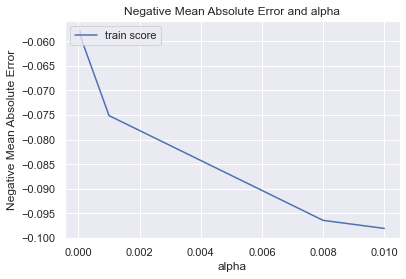

In [403]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [404]:
model_cv.best_params_

{'alpha': 0.2}

In [405]:
ridge = Ridge(alpha = 0.2)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9554250254961871
0.7866532096300061


In [406]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [407]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,Id,10.926723
42,MSZoning_RL,0.368968
40,MSZoning_FV,0.363085
41,MSZoning_RH,0.362207
43,MSZoning_RM,0.326803
115,RoofMatl_Membran,0.319516
120,RoofMatl_WdShngl,0.276285
117,RoofMatl_Roll,0.259940
93,Condition2_PosA,0.236329
249,SaleType_ConLD,0.221401


In [408]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9175011497962713
0.8554575467935552


 - Lasso alpha value : {'alpha': 0.001}
 - Ridge alpha value : {'alpha': 0.2}

After compairing both the model we can see that the below Features are best explaining the DataSet
 - MSSubClass
 - RoofMatl_Membran
 - MSZoning_RL
 - MSZoning_FV
 - MSZoning_RH
 - MSZoning_RM
 - Condition2_PosA
 - RoofMatl_WdShngl 